## Demo Fuzzy-C-means clustering: Fundamentals of Fuzzy Logic Course
source: http://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html

First import the needed packages and make sure the plots will be shown inline.

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

%matplotlib inline

First test data is genererated:

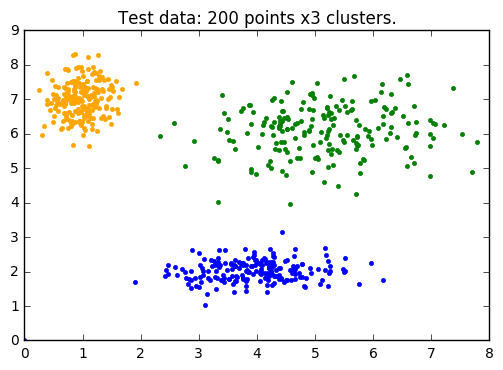

In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

We use the function:

skfuzzy.cmeans(data, c, m, error, maxiter, init=None, seed=None)[source]
Wat is m?

Try out multiple m's and centers

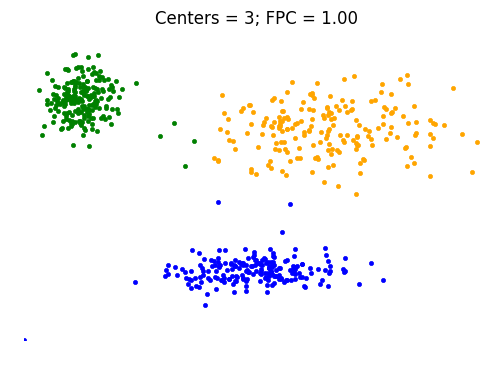

In [8]:
# define your m (more then 2)
# define your c (more then 2)
# how can you see wich one is the best? 
m = 1.1
ncenters = 3

train_data = np.vstack((xpts, ypts))

cntr_train, u_train, u0, d, jm, p, fpc = fuzz.cluster.cmeans(train_data, ncenters, m, error=0.005, maxiter=1000, init=None)

cluster_membership = np.argmax(u_train, axis=0)

for j in range(ncenters):
    plt.plot()
    plt.plot(xpts[cluster_membership == j],ypts[cluster_membership == j], '.', color=colors[j])
plt.title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
plt.axis('off')



plt.show()

Notice how the fuzzy partition coefficient changes with the amount of clusters ("The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric which tells us how cleanly our data is described by a certain model.") 

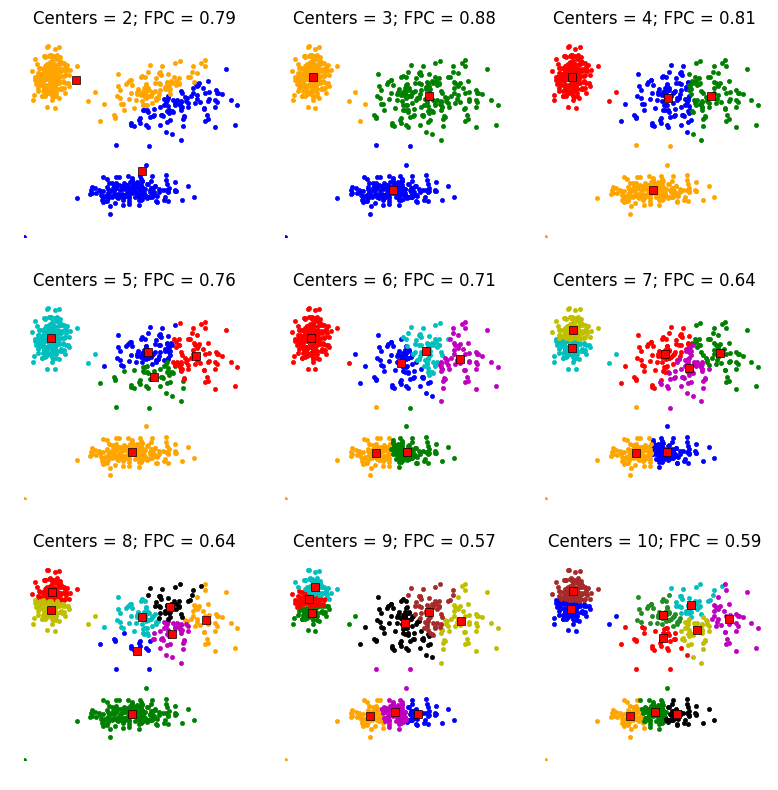

In [4]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Prove that 3 is the best cluster

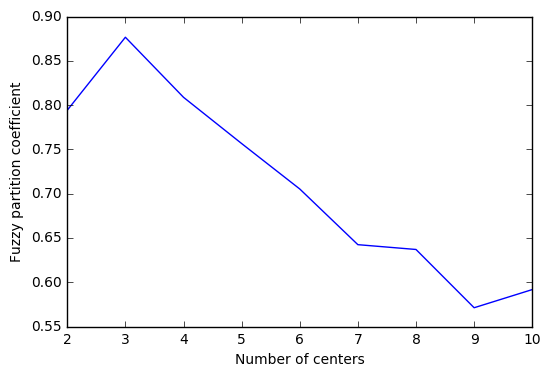

In [5]:
ig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")


Generate a model to learn the real centers

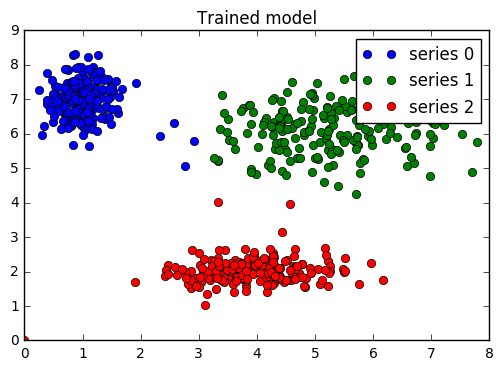

In [6]:
# Regenerate fuzzy model with 3 cluster centers - note that center ordering
# is random in this clustering algorithm, so the centers may change places
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    train_data, 3, 2, error=0.005, maxiter=1000)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

For testing we use the function: skfuzzy.cmeans_predict(test_data, cntr_trained, m, error, maxiter, init=None, seed=None)

u = Final fuzzy c-partitioned matrix.

u0 = Initial guess at fuzzy c-partitioned matrix (either provided init or random guess used if init was not provided).

d = Final Euclidian distance matrix.


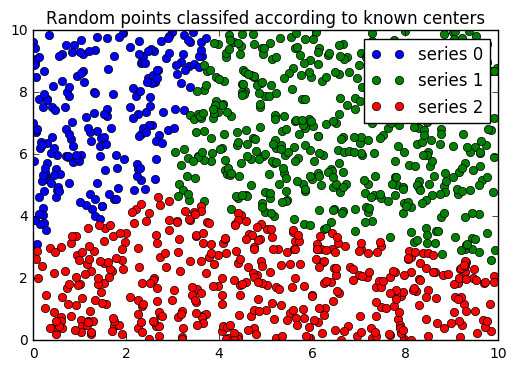

In [7]:
# Generate uniformly sampled data spread across the range [0, 10] in x and y
newdata = np.random.uniform(0, 1, (1100, 2)) * 10

# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, cntr, 2, error=0.005, maxiter=1000)

# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1], 'o',
             label='series ' + str(j))
ax3.legend()

plt.show()
